# Redes Neuronales

En este notebook vamos a construir la unidad básica de las redes neuronales, el Perceptrón. Tiene dos partes:
1. **Perceptrón 2D**: vamos a entrenar un Perceptrón con Keras sobre un dataset ficticio. Exploramos cómo son las fronteras en 2D. Limitaciones del Perceptrón. Generamos un dataset no-linealmente separable y vemos cómo responde el Perceptrón.
2. **MNIST**: vamos a trabajar con este conocido dataset. El objetivo es identificar dígitos, del 0 al 9, escritos a manos. Primero entrenaremos una red neuronal de una capa y luego una Red Neuronal de más capas.

## 1. Perceptrón en 2D

Vamos a generar un dataset sintético con unas funciones que ya vienen incorporadas en scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
from sklearn.datasets.samples_generator import make_blobs, make_moons
#X, y = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=0)

X, y = make_moons(n_samples=1000, random_state=0)

ModuleNotFoundError: ignored

In [ ]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


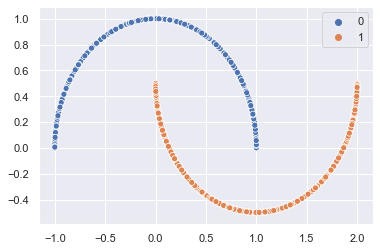

In [ ]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Reescalamos los datos

In [ ]:
X[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

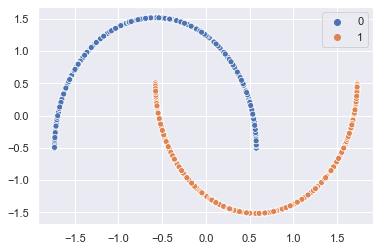

In [ ]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Definimos el modelo a entrenar y volvemos a mirar algunas de sus características.

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.0, beta_2=0.0, epsilon=None, decay=0.0, amsgrad=False)
#model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=250, validation_split=0.25)

Train on 750 samples, validate on 250 samples
Epoch 1/250
750/750 [==============================] - 2s 2ms/step - loss: 0.7726 - accuracy: 0.4800 - val_loss: 0.7300 - val_accuracy: 0.5080
Epoch 2/250
750/750 [==============================] - 0s 143us/step - loss: 0.7198 - accuracy: 0.4973 - val_loss: 0.6867 - val_accuracy: 0.5080
Epoch 3/250
750/750 [==============================] - 0s 144us/step - loss: 0.6780 - accuracy: 0.4973 - val_loss: 0.6480 - val_accuracy: 0.5080
Epoch 4/250
750/750 [==============================] - 0s 124us/step - loss: 0.6394 - accuracy: 0.4973 - val_loss: 0.6115 - val_accuracy: 0.5080
Epoch 5/250
750/750 [==============================] - 0s 145us/step - loss: 0.6041 - accuracy: 0.4867 - val_loss: 0.5796 - val_accuracy: 0.4760
Epoch 6/250
750/750 [==============================] - 0s 145us/step - loss: 0.5722 - accuracy: 0.5560 - val_loss: 0.5502 - val_accuracy: 0.7080
Epoch 7/250
750/750 [==============================] - 0s 171us/step - loss: 0.5440 - 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Notar que se agregaron una keys, asociadas al set de validación. Grafiquemos.

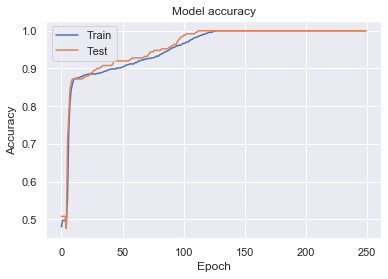

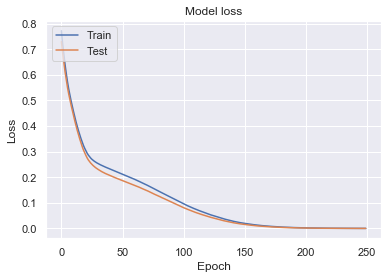

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

¿Cuántos parámetros tiene ahora el modelo?

In [ ]:
print(model.get_weights())

[array([[ 1.8669696 , -0.01593435,  2.657878  , -2.733634  , -3.265294  ,
         2.8964756 , -0.01595607, -2.1713493 ,  1.277373  , -0.01430332],
       [-0.5061922 ,  1.4938425 ,  0.7545324 , -1.1387423 , -0.22914897,
         0.24047433,  1.4631107 , -0.13894328, -1.7948692 ,  1.2737508 ]],
      dtype=float32), array([-1.2479904 , -0.7250034 ,  1.4701357 ,  1.0901423 , -1.7910999 ,
       -1.5667585 , -0.71374494, -1.1938757 , -1.1864238 , -0.61910236],
      dtype=float32), array([[ 3.997687 ],
       [-2.2557163],
       [-2.52002  ],
       [ 3.5626733],
       [-5.314181 ],
       [ 4.4578795],
       [-2.5337272],
       [-4.335253 ],
       [ 2.8112998],
       [-3.3482823]], dtype=float32), array([-0.24653171], dtype=float32)]


Y graficamos las fronteras de decisión. ¿Notan que ya no es una frontera abrupta, sino que hay una zona de cambio?¿A qué se debe?

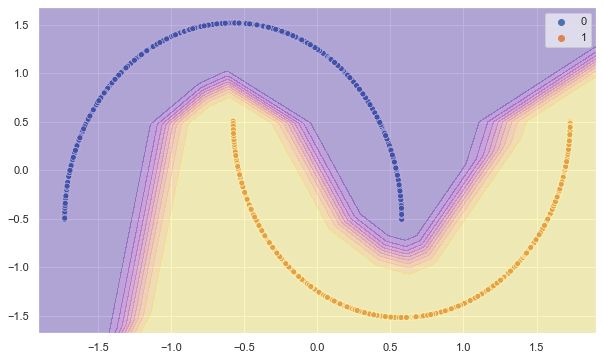

In [ ]:
plt.figure(figsize = (10,6))

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, levels = 10, alpha=0.3, cmap = 'plasma')
plt.show()

**Ejercicio:** volver a correr esta sección, pero reemplazando la función que genera los datos `make_blobs` por `make_moons`. ¿Qué problema ven en el resultado?

**Ejercicio**: con los datos producidos por `make_moons`, agregar una capa a la red neuronal, con 10 neuronas y función de activación `relu`.

## 2. MNIST

El dataset de MNIST es un dataset muy conocido. Consiste en dígitos escritos a mano. Muchas modelos de redes neuronales son probados primeros en este set. Pueden encontrar una descripción más detallada, y un ranking de modelos con su desempeño, en el siguiente link.

https://en.wikipedia.org/wiki/MNIST_database

Vamos a arrancar con una sola capa, con una activación `softmax`, ya que se trata de diez clases.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os #esta libreria permite trabajar con funciones del sistema operativo
import random

from sklearn.model_selection import train_test_split

**1. Carga de datos**

Cada instancia del dataset es una imagen guardada en una carpeta con la etiqueta correspondiente.

In [ ]:
directorio_raiz = 'DataSets/MNIST/'

Miramos las carpetas que hay adentro de la carpeta MNIST

In [ ]:
print(os.listdir(directorio_raiz))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Creamos los contenedores vacíos

In [ ]:
todas_imagenes = []
y_todas_imagenes = []

y los llenamos.

In [ ]:
digitos = np.arange(0,10)
for digito in digitos:
    directorio = directorio_raiz + str(digito) + '/'
    print(digito, directorio)
    for imagen in os.listdir(directorio):
        todas_imagenes.append(plt.imread(directorio + imagen))
        y_todas_imagenes.append(digito)

        #print('todas_imagenes.append(plt.imread("' + directorio + imagen + '", format="png"))')
        #print('Imagen: ' + directorio + imagen)
        #todas_imagenes.append(plt.imread(directorio + imagen, format='png'))
        #y_todas_imagenes.append(digito)
todas_imagenes = np.array(todas_imagenes)
y_todas_imagenes = np.array(y_todas_imagenes)

0 DataSets/MNIST/0/
1 DataSets/MNIST/1/
2 DataSets/MNIST/2/
3 DataSets/MNIST/3/
4 DataSets/MNIST/4/
5 DataSets/MNIST/5/
6 DataSets/MNIST/6/
7 DataSets/MNIST/7/
8 DataSets/MNIST/8/
9 DataSets/MNIST/9/


El resultado es un array de 4 dimensiones, siendo la primera el identificador de la foto, la segunda y tercera son ancho y largo respectivamente, y la última es el valor RGBA. Para hacer esto, nos quedamos con una de las capas de RGBA, que son 4

In [ ]:
todas_imagenes.shape

(42000, 28, 28)

**2. Preprocesado**

**Ejercicio:** Mirar el `shape` de `X` y responder: ¿Cuántas instancias son?¿Qué ancho y largo tienen las imágenes?¿Cuántas bandas?

In [ ]:
print(todas_imagenes.shape, y_todas_imagenes.shape)
n_instancias = todas_imagenes.shape[0]
ancho_imagen = todas_imagenes.shape[1]
largo_imagen = todas_imagenes.shape[2]

(42000, 28, 28) (42000,)


In [ ]:
n_instancias

42000

In [ ]:
ancho_imagen

28

In [ ]:
largo_imagen

28

Notar la diferencia entre levantar la imagen con una u otra librería:

In [ ]:
from PIL import Image
im = Image.open('DataSets/MNIST/0/img_1.jpg')
im

In [ ]:
im2 = plt.imread('DataSets/MNIST/0/img_1.jpg', format='jpg')
im2.shape

(28, 28)

Miramos una imagen al azar.

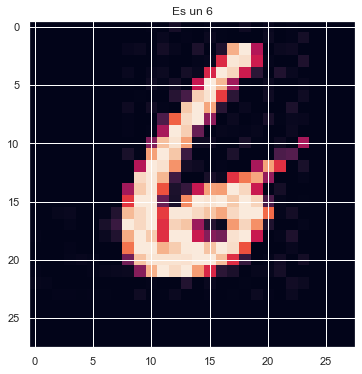

In [ ]:
idx_imagen = np.random.randint(0,todas_imagenes.shape[0])
plt.figure(figsize = (6,6))
plt.title('Es un ' + str(y_todas_imagenes[idx_imagen]))
plt.imshow(todas_imagenes[idx_imagen, :, :])
plt.show()

**Ejercicio:** Crear un arreglo `X` que sea igual a `todas_imagenes`, pero de forma `(n_instancias, largo_imagen * ancho_imagen)`.

In [ ]:
X = todas_imagenes.reshape(n_instancias, largo_imagen*ancho_imagen)
print(X.shape)

(42000, 784)


**Ejercicio:** Reescalar las imágenes entre 0 y 1.

In [ ]:
X = X/255

**Ejercicio:** usar el `to_categorical` de Keras para llevar `y_todas_imagenes` a una columna con unos y ceros para cada clase `y` (One Hot Encoding).

In [ ]:
from keras.utils import to_categorical
y = to_categorical(y_todas_imagenes)

In [ ]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

**Ejercicio:** hacer un `train_test_split`. Usar el 20% del dataset como conjunto de test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

**3. Entrenamiento del modelo**

Comenzar entrenando un Red Neuronal de una capa, con diez neuronas, función de activación `softmax` y pérdida `categorical_crossentropy`. Usar como optimizador `Adam` y `epoch = 20`.

https://keras.io/api/

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras

model = Sequential()
model.add(Dense(784, activation='relu')) #28x28
model.add(Dense(196, activation='relu')) #14x14
model.add(Dense(10, activation='softmax'))

#optimizador = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

#model.compile(optimizer=optimizador,loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) #optimizer='rmsprop'

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Train on 30240 samples, validate on 3360 samples
Epoch 1/10
30240/30240 [==============================] - 21s 701us/step - loss: 0.2365 - accuracy: 0.9265 - val_loss: 0.1484 - val_accuracy: 0.9530
Epoch 2/10
30240/30240 [==============================] - 30s 1ms/step - loss: 0.0945 - accuracy: 0.9704 - val_loss: 0.1048 - val_accuracy: 0.9679
Epoch 3/10
30240/30240 [==============================] - 22s 732us/step - loss: 0.0634 - accuracy: 0.9800 - val_loss: 0.1084 - val_accuracy: 0.9690
Epoch 4/10
30240/30240 [==============================] - 21s 696us/step - loss: 0.0432 - accuracy: 0.9863 - val_loss: 0.1288 - val_accuracy: 0.9637
Epoch 5/10
30240/30240 [==============================] - 25s 837us/step - loss: 0.0368 - accuracy: 0.9878 - val_loss: 0.1229 - val_accuracy: 0.9682
Epoch 6/10
30240/30240 [==============================] - 25s 838us/step - loss: 0.0284 - accuracy: 0.9904 - val_loss: 0.1343 - val_accuracy: 0.9690
Epoch 7/10
30240/30240 [==============================] - 2

**Ejercicio:** ¿cuántos parámetros tiene el modelo? Recordar que hay una función de Keras que hace un *informe* de la red neuronal.

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_7 (Dense)              (None, 196)               153860    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1970      
Total params: 771,270
Trainable params: 771,270
Non-trainable params: 0
_________________________________________________________________


**Ejercicio:** Graficar la pérdida y la exactitud en función de *epochs* para validación y entrenamiento.

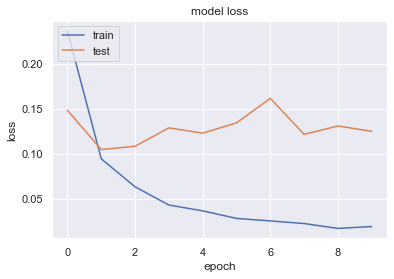

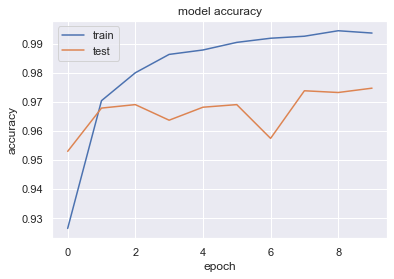

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**4. Evaluación de los resultados.**

**Ejercicio**: predecir las etiquetas de todo el set de testeo.

In [ ]:
y_test_pred = model.predict(X_test)

Esto sirve para pasar de probabilidades a la etiqueta en sí. En este caso, la etiqueta es el dígito, y corresponde al número de columna.

In [ ]:
y_test_pred = np.argmax(y_test_pred, axis = 1)
y_test_pred.shape

(8400,)

In [ ]:
### **Ejercicio:** Calcular exactitud y la matriz de confusión para el conjunto de entrenamiento.

In [ ]:
from sklearn.metrics import confusion_matrix

y_test = np.argmax(y_test,axis = 1)

confusion_matrix(y_test, y_test_pred)

array([[807,   0,   6,   0,   2,   3,   3,   1,   3,   2],
       [  0, 921,   5,   1,   0,   0,   0,   5,   4,   1],
       [  0,   0, 825,   1,   1,   1,   1,   3,   1,   2],
       [  0,   0,  14, 836,   1,   9,   0,   4,   2,   4],
       [  0,   1,   2,   0, 787,   0,   6,   3,   2,  13],
       [  1,   0,   0,   5,   2, 745,   2,   1,   2,   1],
       [  5,   0,   1,   0,   0,   1, 819,   0,   1,   0],
       [  1,   3,   2,   0,   1,   0,   0, 864,   0,   9],
       [  0,   1,  10,  11,   2,   4,   3,   7, 769,   6],
       [  3,   0,   1,   2,   6,   7,   0,   7,   2, 810]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9741666666666666

**Ejercicio:** ¿Dónde se está confundiendo? Graficar algunos ejemplos.

In [ ]:
errores = y_test != y_test_pred

In [ ]:
imagenes_errores = X_test[errores,:]
y_test_errores = y_test[errores]

y_test_pred_errores = y_test_pred[errores]
print(imagenes_errores.shape)

(217, 784)


In [ ]:
imagenes_errores = imagenes_errores.reshape(imagenes_errores.shape[0], ancho_imagen, largo_imagen)
print(imagenes_errores.shape)

(217, 28, 28)


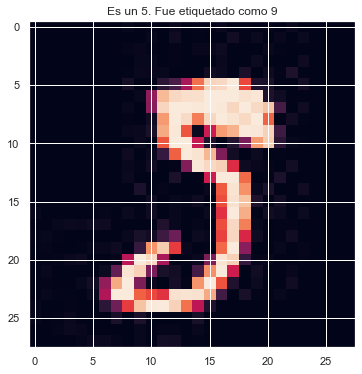

In [ ]:
idx_imagen = np.random.randint(0,imagenes_errores.shape[0])
plt.figure(figsize = (6,6))
plt.title('Es un ' + str(y_test_errores[idx_imagen]) +'. Fue etiquetado como ' + str(y_test_pred_errores[idx_imagen]))
plt.imshow(imagenes_errores[idx_imagen, :, :])
plt.show()

**Ejercicio:** Volver a entrenar, pero agregando una capa con 800 neuronas y función de activación `relu`.

**Extra:** En el caso del Perceptrón de una sola capa (10 neuronas de salida y nada más), ¿qué está viendo la red?

Notar que los parámetros para cualquiera de las neuronas de salida son 784 + Bias. Como hay 10 neuronas, son 7850 parámetros. Keras, con las función `model.get_weights()`, devuelve todos los pesos y *biases* de cada neurona. Seleccionado la primera componente, descartamos los *biases*.

In [ ]:
ws = model.get_weights()[0]
print(ws.shape)

(784, 784)


Notar que son 784: un peso por cada pixel de la imagen - sin el bias - por diez neuronas.

Como son 784, podemos llevarlos a la forma `(28,28)` y graficarlos como si fueran una imagen. Hacemos eso para todas las neuronas.

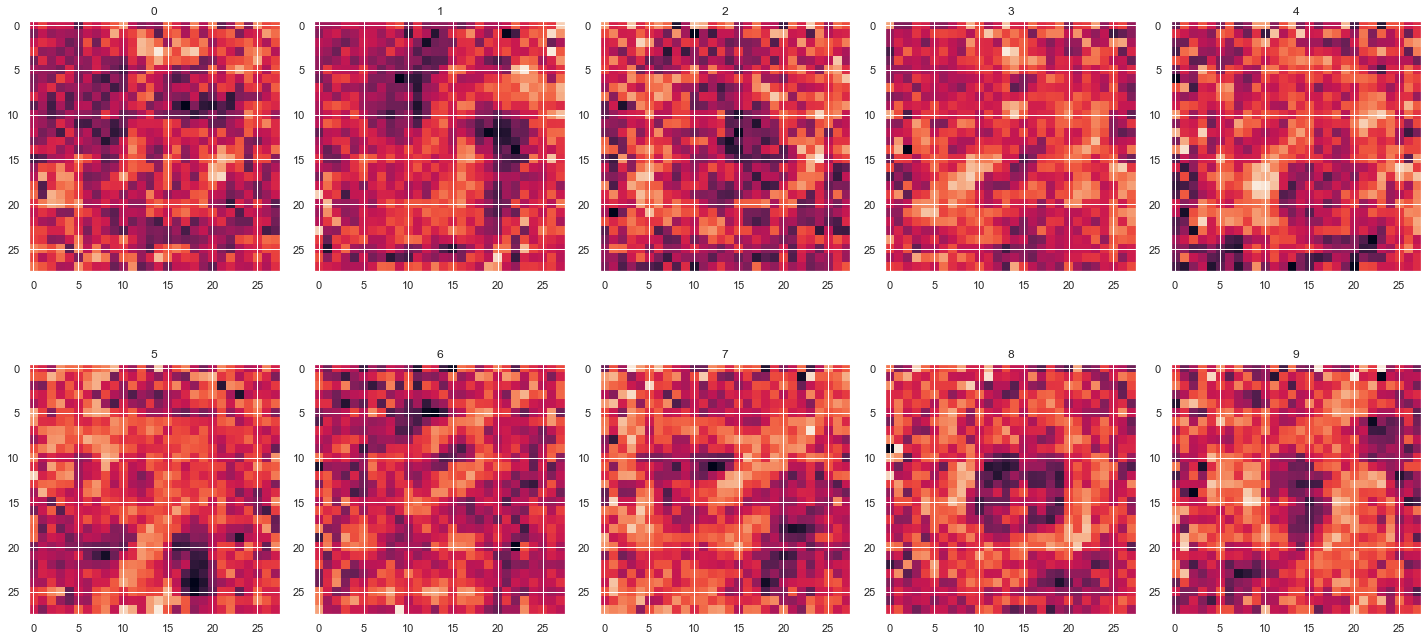

In [ ]:
plt.figure(figsize = (20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    w0 = ws[:,i]
    plt.title(i)
    plt.imshow(w0.reshape(28,28))
plt.tight_layout()
plt.show()

Ahora editen el archivo "imagen_prueba.png" dibujando un digito para verificar que el modelo detecte de cual se trata:

In [ ]:
imagen_prueba = plt.imread('Datasets/imagen_prueba.png', format='png')
imagen_prueba.shape

(28, 28, 4)

In [ ]:
imagen_prueba = imagen_prueba[:,:,0]

In [ ]:
imagen_prueba = imagen_prueba.reshape(1, largo_imagen*ancho_imagen)

In [ ]:
imagen_prueba.shape

(1, 784)

In [ ]:
y_imagen_prueba = model.predict(imagen_prueba)

In [ ]:
y_imagen_prueba = np.argmax(y_imagen_prueba, axis = 1)

In [ ]:
print("La imagen es un:", y_imagen_prueba[0])

La imagen es un: 6


https://www.cs.ryerson.ca/~aharley/vis/fc/